In [1]:
from netCDF4 import Dataset 
import numpy as np 
import math
import scipy.stats as stats 
import matplotlib.pyplot as plot
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator
from scipy import signal
import scipy.io
from scipy import signal
# import seaborn
import seaborn as sns
from scipy.stats import ks_2samp
from sklearn import preprocessing
import pandas as pd
import statistics

In [2]:
filename = ['vt4590n100h_all_dm.nc','vt4590n100h_flat_dm.nc','vt4590n100h_syms_dm.nc','vt4590n100h_fs_dm.nc']
stedvtn = np.zeros((4,12,60))
vtn = np.zeros((4,5,59))

for f in range(4):
    
    filename1 = filename[f]
    ncin1 = Dataset(filename1, 'r', format='NETCDF4') 
    v = ncin1.variables['v'] 
    v = (np.array(v))
    t = ncin1.variables['t'] 
    t = (np.array(t))
    print(v.shape)



    st = [0,31,59,90,120,151,181,212,243,273,304,334]
    ed = [31,59,90,120,151,181,212,243,273,304,334,365]
    edr = [31,60,91,121,152,182,213,244,274,305,335,366]
    
    vt = np.zeros((366,192,60))

    for i in range(60):
        for m in range(366):
            for j in range(192):
                vt[m,j,i] = (v[m,j,i]-np.mean(v[m,:,i]))*(t[m,j,i]-np.mean(t[m,:,i]))    

    vtave = np.zeros((12,192,60))    

    for j in range(192):
        for i in range(60):
            for m in range(12):
                if (i+2)%4 == 0:
                    for d in range(st[m],edr[m]):
                        dd = edr[m] - st[m]
                        vtave[m,j,i] = vtave[m,j,i]+vt[d,j,i]/dd
                else:
                    for d in range(st[m],ed[m]):
                        dd = ed[m] - st[m]
                        vtave[m,j,i] = vtave[m,j,i]+vt[d,j,i]/dd 


    stedvtn[f,:,:] = np.mean(vtave,axis = 1)
    
    for i in range(59):
        vtn[f,0:2,i] = stedvtn[f,10:12,i]
        vtn[f,2:5,i] = stedvtn[f,0:3,i+1]

(366, 192, 60)
(366, 192, 60)
(366, 192, 60)
(366, 192, 60)


In [3]:
filename = ['vt4590s100h_all_dm.nc','vt4590s100h_flat_dm.nc','vt4590s100h_syms_dm.nc','vt4590s100h_fs_dm.nc']
stedvts = np.zeros((4,12,60))
vts = np.zeros((4,5,60))

for f in range(4):
    
    filename1 = filename[f]
    ncin1 = Dataset(filename1, 'r', format='NETCDF4') 
    v = ncin1.variables['v'] 
    v = (np.array(v))
    t = ncin1.variables['t'] 
    t = (np.array(t))
    print(v.shape)

    vave = np.zeros((12,192,60))
    tave = np.zeros((12,192,60))


    st = [0,31,59,90,120,151,181,212,243,273,304,334]
    ed = [31,59,90,120,151,181,212,243,273,304,334,365]
    edr = [31,60,91,121,152,182,213,244,274,305,335,366]
    
    vt = np.zeros((366,192,60))

    for i in range(60):
        for m in range(366):
            for j in range(192):
                vt[m,j,i] = (v[m,j,i]-np.mean(v[m,:,i]))*(t[m,j,i]-np.mean(t[m,:,i]))    

    vtave = np.zeros((12,192,60))    

    for j in range(192):
        for i in range(60):
            for m in range(12):
                if (i+2)%4 == 0:
                    for d in range(st[m],edr[m]):
                        dd = edr[m] - st[m]
                        vtave[m,j,i] = vtave[m,j,i]+vt[d,j,i]/dd
                else:
                    for d in range(st[m],ed[m]):
                        dd = ed[m] - st[m]
                        vtave[m,j,i] = vtave[m,j,i]+vt[d,j,i]/dd 


    stedvts[f,:,:] = np.mean(vtave,axis = 1)
    
    for i in range(60):
        vts[f,:,i] = stedvts[f,4:9,i]

(366, 192, 60)
(366, 192, 60)
(366, 192, 60)
(366, 192, 60)


In [4]:
vpl = np.zeros((4,96,192,26))
vplre = np.zeros((4,96,192,26))

tpl = np.zeros((4,96,192,26))
tplre = np.zeros((4,96,192,26))

vt = np.zeros((4,96,192,26))
vtre = np.zeros((4,96,192,26))

vtn = np.zeros((4,5,59))
vts = np.zeros((4,5,59))


filename1 = 'vt_allp_vint_all.nc'
ncin1 = Dataset(filename1, 'r', format='NETCDF4') 

t = ncin1.variables['t']
t = (np.array(t))
v = ncin1.variables['v'] 
v = (np.array(v))
print(t.shape)


vv = np.zeros((26,192,96,5,59))
tt = np.zeros((26,192,96,5,59))

for i in range(59):
    vv[:,:,0:48,0:2,i] = v[:,:,0:48,10:12,i]
    vv[:,:,0:48,2:5,i] = v[:,:,0:48,0:3,i+1]
    tt[:,:,0:48,0:2,i] = t[:,:,0:48,10:12,i]
    tt[:,:,0:48,2:5,i] = t[:,:,0:48,0:3,i+1]
for i in range(59):
    vv[:,:,48:96,:,i] = v[:,:,48:96,4:9,i]
    tt[:,:,48:96,:,i] = t[:,:,48:96,4:9,i]

vvv = np.zeros((26,192,96,5,59))
ttt = np.zeros((26,192,96,5,59))
    
for i in range(192):
    vvv[:,i,:,:,:] = vv[:,i,:,:,:]-np.mean(vv,axis=1)
    ttt[:,i,:,:,:] = tt[:,i,:,:,:]-np.mean(tt,axis=1)

vtn[0,:,:] = np.mean(np.mean(vvv[12,:,0:23,:,:]*ttt[12,:,0:23,:,:],axis=1),axis=0)
vts[0,:,:] = np.mean(np.mean(vvv[12,:,72:95,:,:]*ttt[12,:,72:95,:,:],axis=1),axis=0)

print(0)


filename1 = 'vt_allp_vint_flat.nc'
ncin1 = Dataset(filename1, 'r', format='NETCDF4') 

t = ncin1.variables['t']
t = (np.array(t))
v = ncin1.variables['v'] 
v = (np.array(v))


vv = np.zeros((26,192,96,5,59))
tt = np.zeros((26,192,96,5,59))

for i in range(59):
    vv[:,:,0:48,0:2,i] = v[:,:,0:48,10:12,i]
    vv[:,:,0:48,2:5,i] = v[:,:,0:48,0:3,i+1]
    tt[:,:,0:48,0:2,i] = t[:,:,0:48,10:12,i]
    tt[:,:,0:48,2:5,i] = t[:,:,0:48,0:3,i+1]
for i in range(59):
    vv[:,:,48:96,:,i] = v[:,:,48:96,4:9,i]
    tt[:,:,48:96,:,i] = t[:,:,48:96,4:9,i]

vvv = np.zeros((26,192,96,5,59))
ttt = np.zeros((26,192,96,5,59))
    
for i in range(192):
    vvv[:,i,:,:,:] = vv[:,i,:,:,:]-np.mean(vv,axis=1)
    ttt[:,i,:,:,:] = tt[:,i,:,:,:]-np.mean(tt,axis=1)

vtn[1,:,:] = np.mean(np.mean(vvv[12,:,0:23,:,:]*ttt[12,:,0:23,:,:],axis=1),axis=0)
vts[1,:,:] = np.mean(np.mean(vvv[12,:,72:95,:,:]*ttt[12,:,72:95,:,:],axis=1),axis=0)

print(1)




filename1 = 'vt_allp_vint_syms.nc'
ncin1 = Dataset(filename1, 'r', format='NETCDF4') 

t = ncin1.variables['t']
t = (np.array(t))
v = ncin1.variables['v'] 
v = (np.array(v))


vv = np.zeros((26,192,96,5,59))
tt = np.zeros((26,192,96,5,59))

for i in range(59):
    vv[:,:,0:48,0:2,i] = v[:,:,0:48,10:12,i]
    vv[:,:,0:48,2:5,i] = v[:,:,0:48,0:3,i+1]
    tt[:,:,0:48,0:2,i] = t[:,:,0:48,10:12,i]
    tt[:,:,0:48,2:5,i] = t[:,:,0:48,0:3,i+1]
for i in range(59):
    vv[:,:,48:96,:,i] = v[:,:,48:96,4:9,i]
    tt[:,:,48:96,:,i] = t[:,:,48:96,4:9,i]

vvv = np.zeros((26,192,96,5,59))
ttt = np.zeros((26,192,96,5,59))
    
for i in range(192):
    vvv[:,i,:,:,:] = vv[:,i,:,:,:]-np.mean(vv,axis=1)
    ttt[:,i,:,:,:] = tt[:,i,:,:,:]-np.mean(tt,axis=1)

vtn[2,:,:] = np.mean(np.mean(vvv[12,:,0:23,:,:]*ttt[12,:,0:23,:,:],axis=1),axis=0)
vts[2,:,:] = np.mean(np.mean(vvv[12,:,72:95,:,:]*ttt[12,:,72:95,:,:],axis=1),axis=0)

print(2)





filename1 = 'vt_allp_vint_fs.nc'
ncin1 = Dataset(filename1, 'r', format='NETCDF4') 

t = ncin1.variables['t']
t = (np.array(t))
v = ncin1.variables['v'] 
v = (np.array(v))


vv = np.zeros((26,192,96,5,59))
tt = np.zeros((26,192,96,5,59))

for i in range(59):
    vv[:,:,0:48,0:2,i] = v[:,:,0:48,10:12,i]
    vv[:,:,0:48,2:5,i] = v[:,:,0:48,0:3,i+1]
    tt[:,:,0:48,0:2,i] = t[:,:,0:48,10:12,i]
    tt[:,:,0:48,2:5,i] = t[:,:,0:48,0:3,i+1]
for i in range(59):
    vv[:,:,48:96,:,i] = v[:,:,48:96,4:9,i]
    tt[:,:,48:96,:,i] = t[:,:,48:96,4:9,i]

vvv = np.zeros((26,192,96,5,59))
ttt = np.zeros((26,192,96,5,59))
    
for i in range(192):
    vvv[:,i,:,:,:] = vv[:,i,:,:,:]-np.mean(vv,axis=1)
    ttt[:,i,:,:,:] = tt[:,i,:,:,:]-np.mean(tt,axis=1)

vtn[3,:,:] = np.mean(np.mean(vvv[12,:,0:23,:,:]*ttt[12,:,0:23,:,:],axis=1),axis=0)
vts[3,:,:] = np.mean(np.mean(vvv[12,:,72:95,:,:]*ttt[12,:,72:95,:,:],axis=1),axis=0)

print(3)


# vplre=vpl[:,::-1,:]
# tplre=tpl[:,::-1,:]
# vtre=vt[:,::-1,:]

#vpl=-vpl

(26, 192, 96, 12, 60)
0
1
2
3


In [5]:
vy = np.zeros((12,37,96,192,44))
ty = np.zeros((12,37,96,192,44))

for yr in range(1979,2023):
    print(yr)
    ncin1 = Dataset('/home/smliu01/scratch-midway2/ssw/era5/'+str(yr)+'.nc', 'r', format='NETCDF4')
    t = ncin1.variables['t']
    t = (np.array(t))
    v = ncin1.variables['v'] 
    v = (np.array(v))
    
    vy[:,:,:,:,yr-1979] = v
    ty[:,:,:,:,yr-1979] = t

    

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [6]:

vt=np.zeros((37,96,192))
vtre=np.zeros((37,96,192))

vv = np.zeros((5,37,96,192,43))
tt = np.zeros((5,37,96,192,43))

for i in range(43):
    vv[0:2,:,0:48,:,i] = vy[10:12,:,0:48,:,i]
    vv[2:5,:,0:48,:,i] = vy[0:3,:,0:48,:,i+1]
    tt[0:2,:,0:48,:,i] = ty[10:12,:,0:48,:,i]
    tt[2:5,:,0:48,:,i] = ty[0:3,:,0:48,:,i+1]
for i in range(43):
    vv[:,:,48:96,:,i] = vy[4:9,:,48:96,:,i]
    tt[:,:,48:96,:,i] = ty[4:9,:,48:96,:,i]

vvv = np.zeros((5,37,96,192,43))
ttt = np.zeros((5,37,96,192,43))
    
for i in range(192):
    vvv[:,:,:,i,:] = vv[:,:,:,i,:]-np.mean(vv,axis=3)
    ttt[:,:,:,i,:] = tt[:,:,:,i,:]-np.mean(tt,axis=3)
    
vtnera=np.zeros((5,43))
vtsera=np.zeros((5,43))

vtnera[:,:] = np.mean(np.mean(vvv[:,10,0:23,:,:]*ttt[:,10,0:23,:,:],axis=2),axis=1)
vtsera[:,:] = np.mean(np.mean(vvv[:,10,72:95,:,:]*ttt[:,10,72:95,:,:],axis=2),axis=1)

In [7]:
vtn[vtn==0]=np.nan
vts[vts==0]=np.nan

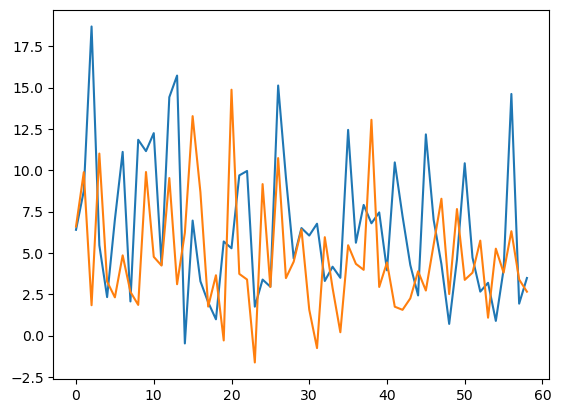

In [8]:
plot.plot(vtn[0,4,:])
plot.plot(-vts[0,4,:])

In [17]:
data = (np.reshape(vtn[0,:,:],59*5))

print(len([x for x in data if x > 15]))

data = (np.reshape(vtn[2,:,:],59*5))

print(len([x for x in data if x > 15]))

21
23


/home/smliu01/scratch-midway2/environment/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/smliu01/scratch-midway2/environment/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/smliu01/scratch-midway2/environment/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/smliu01/scratch-midway2/environment/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

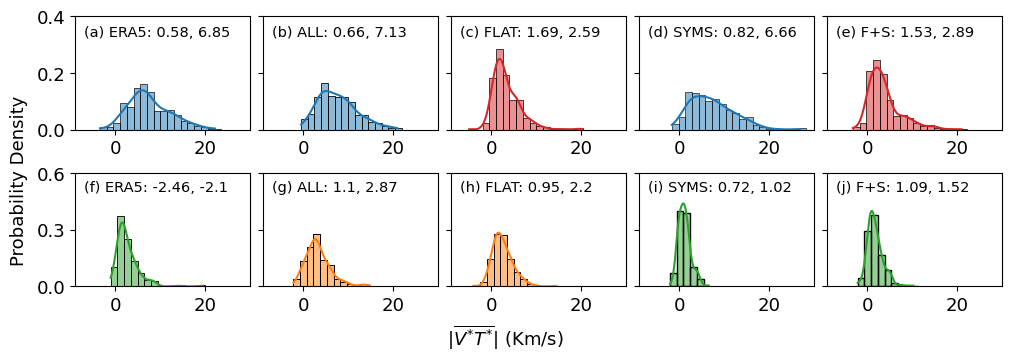

In [11]:


mm = ['ALL','FLAT','SYMS','F+S']
aa = ['(b)','(c)','(d)','(e)']
bb = ['(g)','(h)','(i)','(j)']

fig,ax = plot.subplots(2,5,figsize=(10,3.5),constrained_layout=True)

from scipy.stats import skew
from scipy.stats import kurtosis

#print(skew(np.reshape(a[0:nn,61*4:150*4],356*nn),nan_policy='omit'))
#print(skew(np.reshape(b[0:nn,61*4:150*4],356*nn),nan_policy='omit'))


sns.histplot(np.reshape(vtnera[:,:],43*5),
             binwidth = 1.5,
              kde=True,ax=ax[0,0],color='C0',stat='probability')
ax[0,0].set_xlim([-9,30])
ax[0,0].set_ylim([0,0.4])
ax[0,0].text(-7,0.33,'(a) ERA5: '+str(round(skew(np.reshape(vtnera[:,:],43*5)),2))+', '+str(round(statistics.median(np.reshape(vtnera[:,:],43*5)),2)),size=10.5)


sns.histplot(np.reshape(vtsera[:,:]*(-1),43*5),
             binwidth = 1.5,
              kde=True,ax=ax[1,0],color='C2',stat='probability')
ax[1,0].set_xlim([-9,30])
ax[1,0].set_ylim([0,0.6])
ax[1,0].set_yticks([0,0.3,0.6])
ax[1,0].text(-7,0.5,'(f) ERA5: '+str(round(skew(np.reshape(vtsera[:,:],43*5)),2))+', '+str(round(statistics.median(np.reshape(vtsera[:,:],43*5)),2)),size=10.5)

for r in range(4):
    for c in range(2):
        if c==0:
            if r==0 or r==2:
                sns.histplot(np.reshape(vtn[r,:,:],59*5),
                             binwidth = 1.5,
                              kde=True,ax=ax[c,r+1],color='C0',stat='probability')
            else:
                sns.histplot(np.reshape(vtn[r,:,:],59*5),
                             binwidth = 1.5,
                              kde=True,                             
                          #color='skyblue',
                          #hist_kws={"linewidth": 10,'alpha':0.5},
                         #hist = True,#False, 
                         #kde_kws = {'shade': False, 'linewidth': 2},
                         ax=ax[c,r+1],color='C3',stat='probability')
            ax[c,r+1].set_xlim([-9,30])
            ax[c,r+1].set_ylim([0,0.4])
            if r==3:
                ax[c,r+1].text(-7,0.33,aa[r]+' '+mm[r]+': '+str(round(skew(np.reshape(vtn[r,:,:],59*5)),2))+', '+str(round(statistics.median(np.reshape(vtn[r,:,:],59*5)),2)),size=10.5)
                #ax[c,r].text(-5,0.33,aa[r]+' '+mm[r]+': '+str(round(skew(np.reshape(vtn[r,:,:],29*5),nan_policy='omit').compressed()[0],2)),size=13)
            else:
                ax[c,r+1].text(-7,0.33,aa[r]+' '+mm[r]+': '+str(round(skew(np.reshape(vtn[r,:,:],59*5)),2))+', '+str(round(statistics.median(np.reshape(vtn[r,:,:],59*5)),2)),size=10.5)
        if c==1:
            if r==0:
                sns.histplot(np.reshape(vts[r,:,:]*(-1),59*5),
                              binwidth = 1.5,
                              kde=True,ax=ax[c,r+1],color='C1',stat='probability')
            elif r==1:
                sns.histplot(np.reshape(vts[r,:,:]*(-1),59*5),
                              binwidth = 1.5,
                              kde=True,ax=ax[c,r+1],color='C1',stat='probability')
            elif r==2:
                sns.histplot(np.reshape(vts[r,:,:]*(-1),59*5),
                              binwidth = 1.5,
                              kde=True,ax=ax[c,r+1],color='C2',stat='probability')
            elif r==3:
                sns.histplot(np.reshape(vts[r,:,:]*(-1),59*5),
                              binwidth = 1.5,
                              kde=True,ax=ax[c,r+1],color='C2',stat='probability')

            ax[c,r+1].set_xlim([-9,30])
            ax[c,r+1].set_ylim([0,0.6])
            ax[c,r+1].set_yticks([0,0.3,0.6])
            if r==3:
                ax[c,r+1].text(-7,0.5,bb[r]+' '+mm[r]+': '+str(round(skew(np.reshape(vts[r,:,:]*(-1),59*5)),2))+', '+str(round(statistics.median(np.reshape(vts[r,:,:]*(-1),59*5)),2)),size=10.5)
                #ax[c,r].text(-340,0.33,aa[r]+' '+mm[r]+': '+str(round(skew(np.reshape(vts[r,:,:],30*5),nan_policy='omit').compressed()[0],2)),size=13)
            else:
                ax[c,r+1].text(-7,0.5,bb[r]+' '+mm[r]+': '+str(round(skew(np.reshape(vts[r,:,:]*(-1),59*5)),2))+', '+str(round(statistics.median(np.reshape(vts[r,:,:]*(-1),59*5)),2)),size=10.5)

        #ax[0,0].set_title('NH',size = 15)
        #ax[0,1].set_title('SH',size = 15)
        fig.supxlabel(r'|$\overline{V^{*}T^{*} }$| (Km/s)',size=13)
        fig.supylabel('Probability Density',size=13)
        ax[c,r+1].set_ylabel('')
        ax[c,0].set_ylabel('')
        ax[c,1].set_yticklabels('')
        ax[c,2].set_yticklabels('')
        ax[c,3].set_yticklabels('')
        ax[c,4].set_yticklabels('')
        #ax[xx].set_xticks([])
        plot.rcParams['font.size'] = '13'
        
plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_100_ssw.png',dpi=600,bbox_inches='tight') 



In [10]:
[d,p]=ks_2samp(np.reshape(vts[0,:,:],59*5), np.reshape(vtsera[:,:],43*5))
print(p)

5.385341115870568e-05


<Axes: >

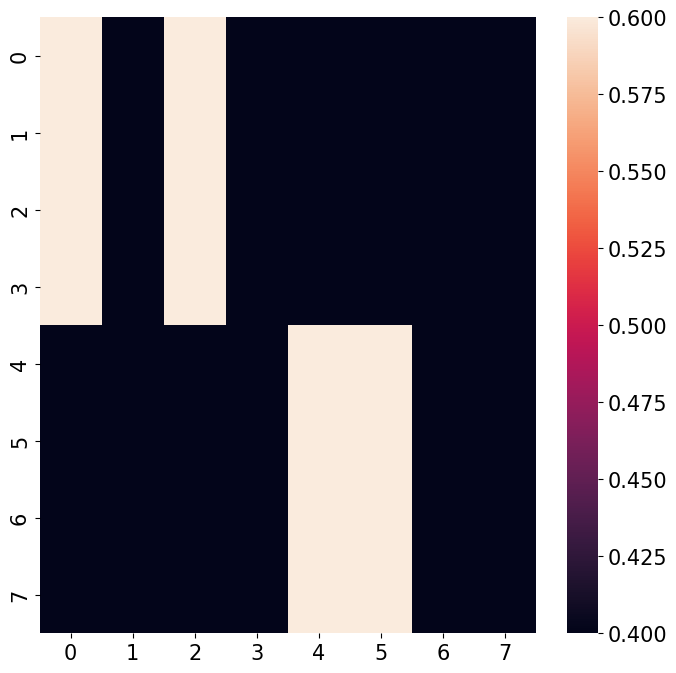

In [8]:
ht = np.zeros((8,8))

for i in range(4):
    for j in range(4):
        [d,p]=ks_2samp(np.reshape(vtn[0,:,:],59*5), np.reshape(vtn[j,:,:],59*5))
        if p>0.05:
            ht[i,j] = 0.6
        else:
            ht[i,j] = 0.4

for i in range(4):
    for j in range(4):
        [d,p]=ks_2samp(np.reshape(vtn[i,:,:],59*5), np.reshape(vts[j,:,:],59*5))
        if p>0.05:
            ht[i,j+4] = 0.6
        else:
            ht[i,j+4] = 0.4
        
for i in range(4):
    for j in range(4):
        [d,p]=ks_2samp(np.reshape(vts[i,:,:],59*5), np.reshape(vtn[j,:,:],59*5))
        if p>0.05:
            ht[i+4,j] = 0.6
        else:
            ht[i+4,j] = 0.4
                       
for i in range(4):
    for j in range(4):
        [d,p]=ks_2samp(np.reshape(vts[0,3:5,:],59*2), np.reshape(vts[j,3:5,:],59*2))
        if p>0.05:
            ht[i+4,j+4] = 0.6
        else:
            ht[i+4,j+4] = 0.4

fig.ax = plot.subplots(figsize=(8,8))
sns.heatmap(ht)
        
# if p<0.05:
#     ax[xx].text(52,220,'pvalue<0.05')
# else:
#     ax[xx].text(52,220,'pvalue>0.05')
#ax[xx].text(75,110,'pvalue = '+str("%e"%round(p,10)))



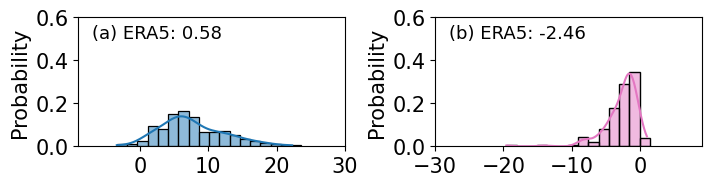

In [42]:

mm = ['ALL','FLAT','SYMS','F+S']
aa = ['(c)','(e)','(g)','(i)']
bb = ['(d)','(f)','(h)','(j)']

fig,ax = plot.subplots(1,2,figsize=(7,1.75),constrained_layout=True)

from scipy.stats import skew
from scipy.stats import kurtosis


sns.histplot(np.reshape(vtnera[:,:],43*5),
             binwidth = 1.5,
              kde=True,ax=ax[0],color='C0',stat='probability')
ax[0].set_xlim([-9,30])
ax[0].set_ylim([0,0.6])
ax[0].text(-7,0.5,'(a) ERA5: '+str(round(skew(np.reshape(vtnera[:,:],43*5)),2)),size=13)


sns.histplot(np.reshape(vtsera[:,:],43*5),
             binwidth = 1.5,
              kde=True,ax=ax[1],color='C6',stat='probability')
ax[1].set_xlim([-30,9])
ax[1].set_ylim([0,0.6])
ax[1].text(-28,0.5,'(b) ERA5: '+str(round(skew(np.reshape(vtsera[:,:],43*5)),2)),size=13)

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_100_era5.png',dpi=600,bbox_inches='tight') 

In [41]:
[d,p]=ks_2samp(np.reshape(vts[0,3:5,:],59*2), np.reshape(vtsera[3:5,:],43*2))
print(p)

0.3681983755343483


In [158]:
[d,p]=ks_2samp(np.reshape(vts[0,:,:],30*5), np.reshape(vts[2,:,:],30*5))
p

1.771162737329753e-11

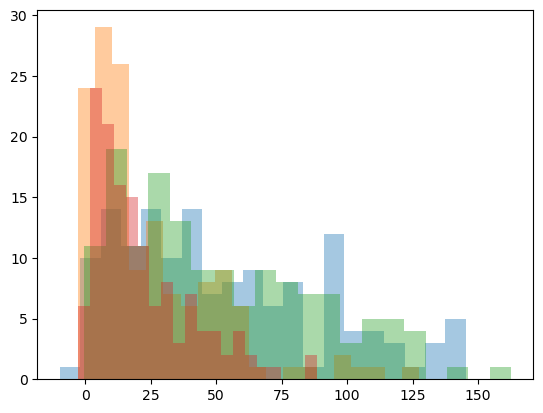

In [68]:
vtn[vtn==0]=np.nan

ax = sns.distplot(np.reshape(vtn[0,:,:],29*5),
                  bins=20,
                  kde=False,
                  #color='skyblue',
                  #hist_kws={"linewidth": 10,'alpha':0.5},
                 hist = True, 
                 kde_kws = {'shade': True, 'linewidth': 2})
ax = sns.distplot(np.reshape(vtn[1,:,:],29*5),
                  bins=20,
                  kde=False,
                  #color='skyblue',
                  #hist_kws={"linewidth": 10,'alpha':0.5},
                 hist = True, 
                 kde_kws = {'shade': True, 'linewidth': 2})
ax = sns.distplot(np.reshape(vtn[2,:,:],29*5),
                  bins=20,
                  kde=False,
                  #color='skyblue',
                  #hist_kws={"linewidth": 10,'alpha':0.5},
                 hist = True, 
                 kde_kws = {'shade': True, 'linewidth': 2})
ax = sns.distplot(np.reshape(vtn[3,:,:],29*5),
                  bins=20,
                  kde=False,
                  #color='skyblue',
                  #hist_kws={"linewidth": 10,'alpha':0.5},
                 hist = True, 
                 kde_kws = {'shade': True, 'linewidth': 2})


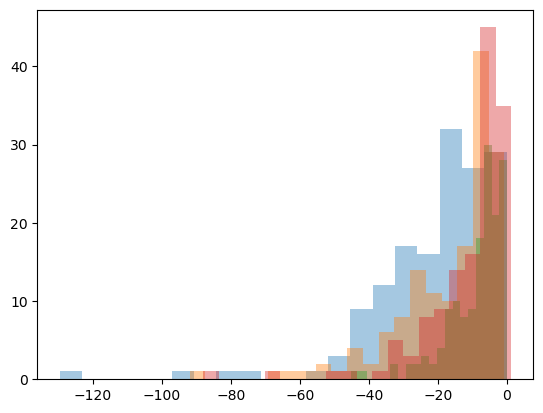

In [72]:
vts[vts==0]=np.nan
ax = sns.distplot(np.reshape(vts[0,:,:],30*5),
                  bins=20,
                  kde=False,
                  #color='skyblue',
                  #hist_kws={"linewidth": 10,'alpha':0.5},
                 hist = True, 
                 kde_kws = {'shade': True, 'linewidth': 2})
ax = sns.distplot(np.reshape(vts[1,:,:],30*5),
                  bins=20,
                  kde=False,
                  #color='skyblue',
                  #hist_kws={"linewidth": 10,'alpha':0.5},
                 hist = True, 
                 kde_kws = {'shade': True, 'linewidth': 2})
ax = sns.distplot(np.reshape(vts[2,:,:],30*5),
                  bins=20,
                  kde=False,
                  #color='skyblue',
                  #hist_kws={"linewidth": 10,'alpha':0.5},
                 hist = True, 
                 kde_kws = {'shade': True, 'linewidth': 2})
ax = sns.distplot(np.reshape(vts[3,:,:],30*5),
                  bins=20,
                  kde=False,
                  #color='skyblue',
                  #hist_kws={"linewidth": 10,'alpha':0.5},
                 hist = True, 
                 kde_kws = {'shade': True, 'linewidth': 2})
